In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

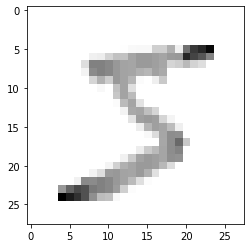

In [4]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2646 - accuracy: 0.9223
Epoch 2/3
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1096 - accuracy: 0.9658
Epoch 3/3
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0738 - accuracy: 0.9764


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [8]:
test1_loss, test1_acc = model.evaluate(x_test, y_test)
print(test1_loss, test1_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.10215365880038589 0.969


In [9]:
model2=tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model2.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model2.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
model2.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.25, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 2s 40us/sample - loss: 0.3253 - accuracy: 0.9039 - val_loss: 0.1982 - val_accuracy: 0.9379
Epoch 2/25
45000/45000 [==============================] - 2s 35us/sample - loss: 0.1305 - accuracy: 0.9599 - val_loss: 0.1326 - val_accuracy: 0.9603
Epoch 3/25
45000/45000 [==============================] - 2s 35us/sample - loss: 0.0894 - accuracy: 0.9726 - val_loss: 0.1240 - val_accuracy: 0.9621
Epoch 4/25
45000/45000 [==============================] - 2s 35us/sample - loss: 0.0672 - accuracy: 0.9794 - val_loss: 0.1283 - val_accuracy: 0.9619
Epoch 5/25
45000/45000 [==============================] - 2s 35us/sample - loss: 0.0497 - accuracy: 0.9844 - val_loss: 0.1186 - val_accuracy: 0.9679
Epoch 6/25
45000/45000 [==============================] - 2s 35us/sample - loss: 0.0389 - accuracy: 0.9875 - val_loss: 0.1255 - val_accuracy: 0.9664
Epoch 7/25
45000/45000 [==============================] 

In [11]:
test2_loss, test2_acc = model2.evaluate(x_test, y_test)
print(test2_loss, test2_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.12266872274677734 0.9712


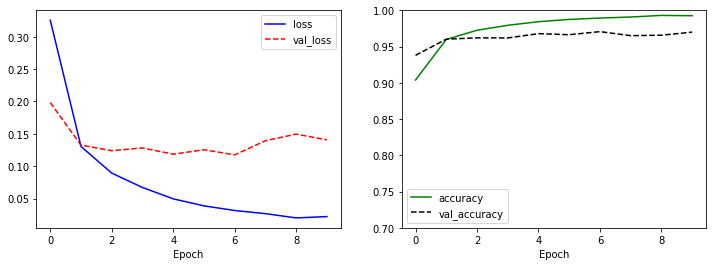

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()
